In [1]:
# Optimization. Data Augmentation by applying SMOTE

In [2]:
# %qtconsole

In [3]:
# imports
import pickle as pkl
import warnings
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from joblib import load
import seaborn as sns
from matplotlib import pyplot as plt
#
from modulePreProcessing import TransformationMethods
from moduleModelTraining import TrainingMethods
from moduleMetrics import MetricsMethods
from moduleUtilities import UtilityMethods
warnings.filterwarnings(action='ignore')

In [4]:
# class instances
fm = TransformationMethods()
train = TrainingMethods()
evaluate = MetricsMethods()
ut = UtilityMethods()

In [5]:
x, y = None, None
features_to_process = 'auto'
with open('fragments/x_'+features_to_process+'.joblib', 'rb') as f: x = load(f)
with open('fragments/y_'+features_to_process+'.joblib', 'rb') as f: y = load(f)

# Instantiate oversampling transformer
oversampler = SMOTE(random_state=7)

# Apply Oversampling
smote_x, smote_y = oversampler.fit_sample(x, y.ravel())

# Save Oversampled data set
pkl.dump(smote_x, open('fragments/smote_x_'+features_to_process+'.joblib', 'wb'))
pkl.dump(smote_y, open('fragments/smote_y_'+features_to_process+'.joblib', 'wb'))

# Split oversampled data set to evaluate it
smote_train_x, smote_test_x, smote_train_y, smote_test_y = train_test_split(smote_x, smote_y, 
                                                                            random_state=ut.sd['random_state'], 
                                                                            test_size=ut.sd['test_size'], 
                                                                            stratify=smote_y)
print('smote_x:',smote_x.shape,' smote_y:',smote_y.shape)
print('smote_train_x:',smote_train_x.shape,' smote_test_x:',smote_test_x.shape)
print('smote_train_y:',smote_train_y.shape,' smote_test_y:',smote_test_y.shape)
print("After SMOTE OverSampling. Count of label NC: {}".format(sum(smote_y==2)))
print("After SMOTE OverSampling. Count of label AD-MCI: {} \n".format(sum(smote_y==1)))

smote_x: (188, 12)  smote_y: (188,)
smote_train_x: (141, 12)  smote_test_x: (47, 12)
smote_train_y: (141,)  smote_test_y: (47,)
After SMOTE OverSampling. Count of label NC: 94
After SMOTE OverSampling. Count of label AD-MCI: 94 



In [6]:
# train models after oversampling
trained_models_smote = train.train_models(smote_train_x, smote_train_y, smote_test_x, smote_test_y)

Trained model:  lr  accuracy:  97.92
Trained model:  dt  accuracy:  100.0
Trained model:  rf  accuracy:  100.0
Trained model:  sv  accuracy:  100.0
Trained model:  gn  accuracy:  100.0
Trained model:  mp  accuracy:  97.92
Trained model:  kn  accuracy:  85.28
Trained model:  ce  accuracy:  100.0
Total training time: 1.88 seconds


Count of label NC (id 2 in Database, 1 in CM) in y_test: 24
Count of label AD-MCI (id 1 in Database, 0 in CM) in y_test: 23 



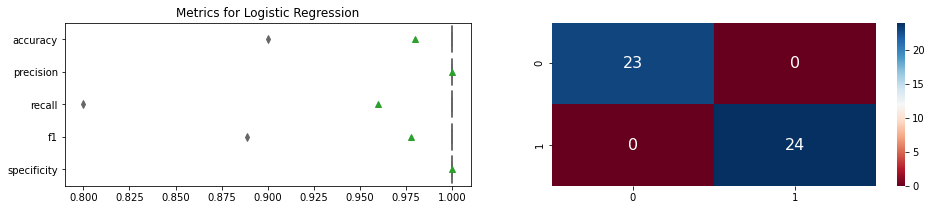

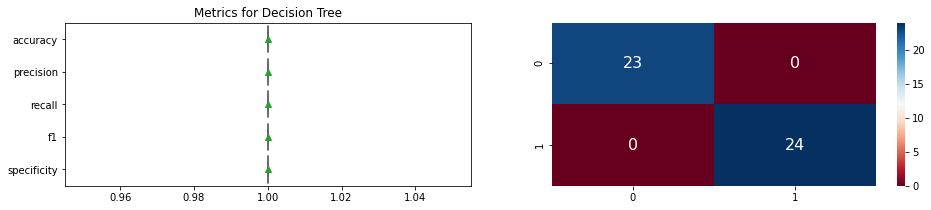

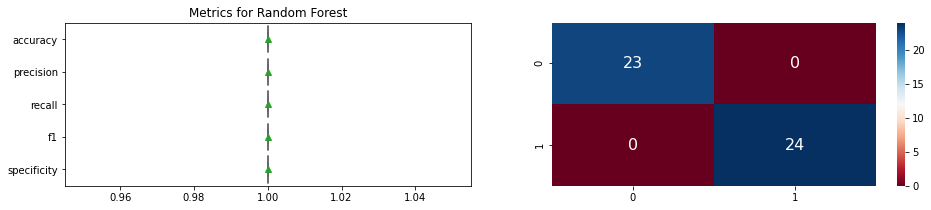

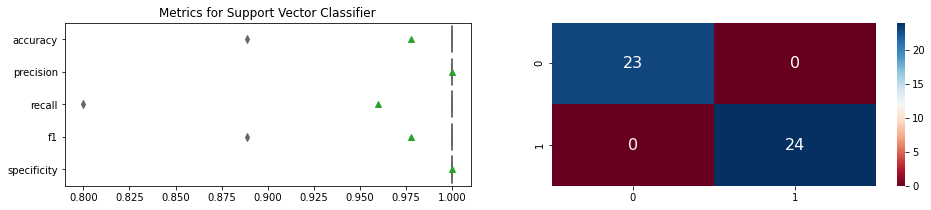

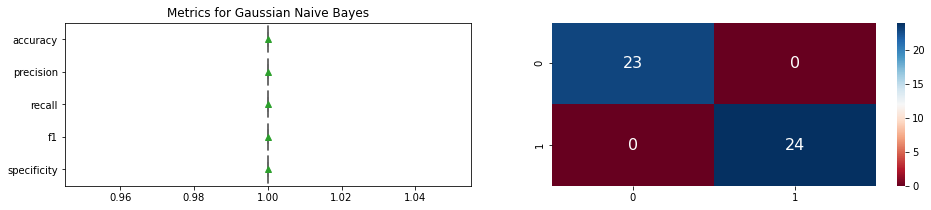

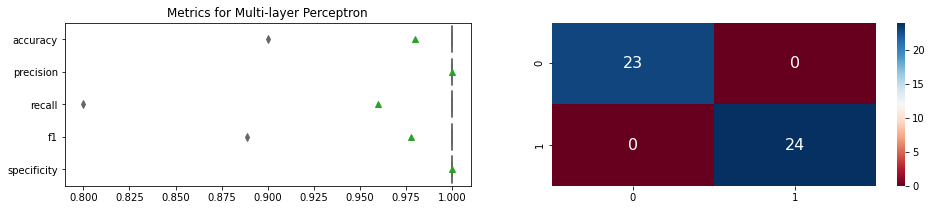

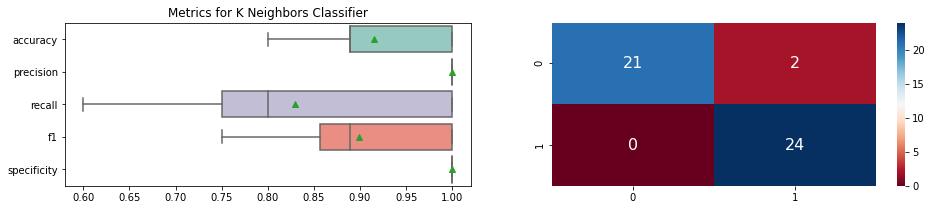

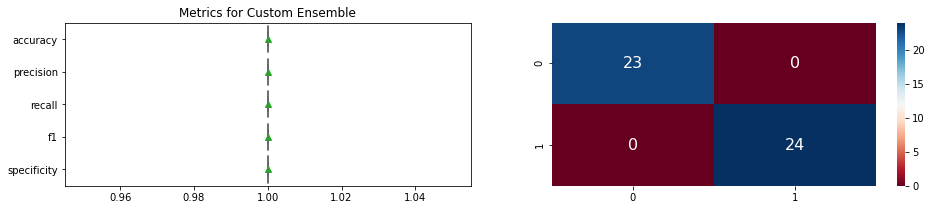

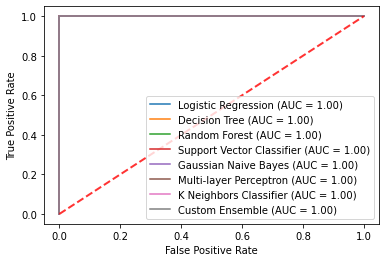

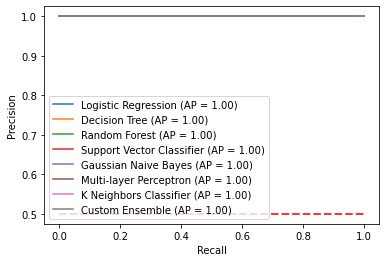

In [7]:
# evaluate models after sampling
evaluate.generate_metrics(trained_models_smote, smote_test_x, smote_test_y, 
                          ['accuracy', 'precision', 'recall', 'f1', 'specificity'], 
                          cv_num=ut.sd['cv_num'], show_raw_data=False)